참조 : https://github.com/deeplearningzerotoall/PyTorch/blob/master/lab-07_2_mnist_introduction.ipynb

# Reading Data

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
device='cuda' if torch.cuda.is_available() else 'cpu'
print(device)
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

cuda


In [3]:
training_epochs=15
batch_size=100

In [4]:
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)

data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

In [5]:
linear = torch.nn.Linear(784,10,bias=True).to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [6]:
for epoch in range(training_epochs):
    avg_cost=0
    total_batch = len(data_loader)
    
    for X,Y in data_loader:
        X=X.view(-1,28*28).to(device)
        Y=Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost/total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 0.535468519
Epoch: 0002 cost = 0.359274179
Epoch: 0003 cost = 0.331187516
Epoch: 0004 cost = 0.316578031
Epoch: 0005 cost = 0.307158172
Epoch: 0006 cost = 0.300180703
Epoch: 0007 cost = 0.295130193
Epoch: 0008 cost = 0.290851504
Epoch: 0009 cost = 0.287417084
Epoch: 0010 cost = 0.284379542
Epoch: 0011 cost = 0.281825215
Epoch: 0012 cost = 0.279800713
Epoch: 0013 cost = 0.277808994
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440885


In [7]:
print(mnist_test.test_data.shape)
print(mnist_test.test_data[0].size())
print(mnist_test.test_data[0].shape)

torch.Size([10000, 28, 28])
torch.Size([28, 28])
torch.Size([28, 28])


C:\Users\la\Anaconda3\envs\tf20\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


Accuracy: 0.8862999677658081
Label:  8
Prediction:  3


C:\Users\la\Anaconda3\envs\tf20\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


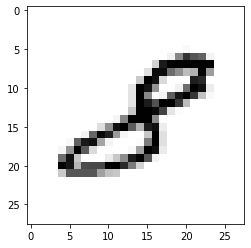

In [8]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    r = random.randint(0, len(mnist_test)-1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
    plt.show()

In [9]:
print(single_prediction)
print(torch.argmax(single_prediction, 1))
print(torch.argmax(single_prediction, 1).item())

tensor([[ -522.8259,   341.9241,   416.3383,  1050.5425,  -618.2194,  -305.8136,
         -1141.5291,  -405.7516,   960.3459,   133.2161]], device='cuda:0')
tensor([3], device='cuda:0')
3
